In [88]:
#!pip install torch torchvision
#!pip install tensorflow


# MNIST — Manual Load

## Step 1: Import libraries


In [89]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  # just to load the data as raw NumPy arrays

## Step 2: Load raw MNIST data (60k train, 10k test)

In [90]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Step 3: Explore data shapes


In [91]:
print("Training data shape:", X_train.shape)   
print("Training labels shape:", y_train.shape) 
print("Test data shape:", X_test.shape)  
print("Test labels shape:", y_test.shape)     

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


## Step 4: Inspect a single image (raw values)


In [92]:
index = 10  # Change this index to view different images
print("Label:", y_train[index])
print("Pixel values:\n", X_train[index])  # Each pixel is a value between 0 and 255

Label: 3
Pixel values:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   

## Step 5: Display some digits


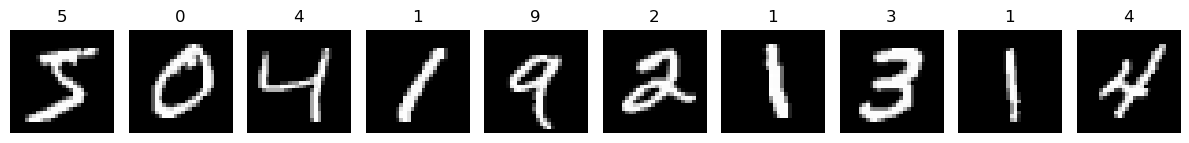

In [93]:
def show_digits(images, labels, n=10):
    plt.figure(figsize=(12, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"{labels[i]}")
        plt.axis('off') 
    plt.tight_layout()
    plt.show()

show_digits(X_train, y_train, n=10)

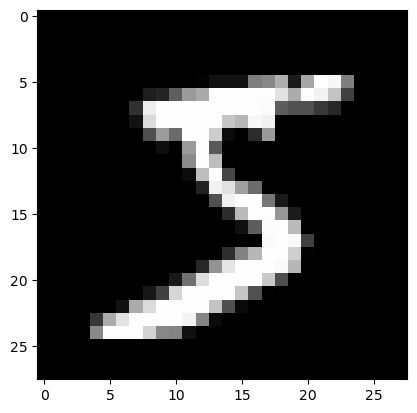

In [103]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

# MNIST - Preprocessing Data

## Step 1 : Flatten images

In [94]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)  # Flatten the images
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [95]:
# X_train.reshape(X_train.shape[0], -1) = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

In [96]:
print("Flattened training data shape:", X_train_flatten.shape)
print("Flattened test data shape:", X_test_flatten.shape)

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


## Step 2 : Normalize images

In [97]:
max_value = np.max(X_train)
print("Max pixel value in training data:", max_value)

Max pixel value in training data: 255


In [98]:
X_train_normalized = X_train_flatten / max_value
X_test_normalized = X_test_flatten / max_value

In [99]:
print("Example of normalized training data:", X_train_normalized[0][100:200]) # Displaying a slice of the first normalized image

Example of normalized training data: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01176471 0.07058824
 0.07058824 0.07058824 0.49411765 0.53333333 0.68627451 0.10196078
 0.65098039 1.         0.96862745 0.49803922 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.11764706 0.14117647
 0.36862745 0.60392157 0.66666667 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.88235294 0.6745098  0.99215686 0.94901961
 0.76470588 0.25098039 0.         0.  